In [ ]:
# NOTES: 
#    1. Before running Analysis Notebook, unzip "Output/Archive.zip" (contains ed13.csv and ed_15.csv)
#    2. This notebook only contains analysis of 2015 education & bullying data, as this was the year used in our
#       presentation. Please refer to the "2013" Starter Notebook for cleaning and analysis of 2013 data.

In [6]:
# Dependencies and Setup

import requests
import pandas as pd
import numpy as np
import us
import matplotlib.pyplot as plt
import gmaps
from scipy.stats import linregress


from config import gkey
gmaps.configure(api_key=gkey)

In [8]:
# ** RUN THIS CELL TO READ IN BULLYING DATA (2015)! **

bully_df = pd.read_csv("Output/bully15.csv")
bully_df.head()

,State,Alleged_Sexual_Harassment,Alleged_Racial_Harassment,Alleged_Disability_Harassment,Alleged_Orientation_Harassment,Alleged_Religion_Harassment
0,Alabama,0,0,0,0,0
1,Alabama,0,0,0,0,0
2,Alabama,1,1,0,1,0
3,Alabama,0,2,0,0,0
4,Alabama,0,0,0,0,0


In [9]:
# Sum allegations to make "Total_Allegations" column

bully_df["State"] = bully_df["State"].astype(str)
bully_df["Total_Allegations"]= bully_df["Alleged_Sexual_Harassment"] + bully_df["Alleged_Racial_Harassment"] + bully_df["Alleged_Disability_Harassment"] + bully_df["Alleged_Orientation_Harassment"]+ bully_df["Alleged_Religion_Harassment"]
bully_df

,State,Alleged_Sexual_Harassment,Alleged_Racial_Harassment,Alleged_Disability_Harassment,Alleged_Orientation_Harassment,Alleged_Religion_Harassment,Total_Allegations
0,Alabama,0,0,0,0,0,0
1,Alabama,0,0,0,0,0,0
2,Alabama,1,1,0,1,0,3
3,Alabama,0,2,0,0,0,2
4,Alabama,0,0,0,0,0,0
...,...,...,...,...,...,...,...
92621,Wyoming,5,13,6,0,0,24
92622,Wyoming,1,0,0,0,0,1
92623,Wyoming,0,0,0,1,0,1
92624,Wyoming,0,0,0,0,0,0


In [10]:
# Group by State to get counts for alleged bullying/harassment cases by state

bully_df["State"] = bully_df["State"].astype(str)
grouped_bully_df = bully_df.groupby("State").sum()

allegations_by_state = pd.DataFrame(grouped_bully_df)
# allegations_by_state["Total_Allegations"].plot(kind="bar")
allegations_by_state.head()

,Alleged_Sexual_Harassment,Alleged_Racial_Harassment,Alleged_Disability_Harassment,Alleged_Orientation_Harassment,Alleged_Religion_Harassment,Total_Allegations
State,,,,,,
Alabama,569,501,81,193,13,1357
Alaska,27,17,4,11,0,59
Arizona,1547,485,218,426,104,2780
Arkansas,595,411,102,111,8,1227
California,8640,3537,2037,2110,1296,17620


In [ ]:
# RUN THIS CELL TO READ IN EDUCATION DATA (2015)!

ed_data = pd.read_csv("Output/ed15.csv")
ed_data.head()

In [ ]:
# Make separate DataFrames for test scores and graduation rates

math_df = ed_data.loc[ed_data["Description"] == "Performance on Statewide Mathematics Assessment"]
reading_df = ed_data.loc[ed_data["Description"] == "Performance on Statewide Reading/Language Arts Assessment"]
science_df = ed_data.loc[ed_data["Description"] == "Performance on Statewide Science Assessment"]
grad_df = ed_data.loc[ed_data["Description"] == "Four-Year Adjusted-Cohort Graduation Rates"]

In [ ]:
# Further clean individual test DataFrames

math_df = math_df.replace({"45-49":"40-49","65-69":"60-79","90-94":"90-100",">=50":"LT50",
                          "LE1":"0-9",">=50":"GE50","<=5":"0-9","<=10":"0-10",">=80":"80-89",
                          ">=90":"90-100","0-10":"0-9","40-49":"40-59","50-59":"40-59","21-39":"20-39"})
math_df = math_df.replace({"20-39":"LT50","40-59":"GE50","60-79":"GE50","80-89":"GE50","0-9":"LT50","40-49":"LT50",
                          "90-100":"GE50","0-10":"LT50","10-19":"LT50"})

In [ ]:
# Further clean individual test DataFrames

reading_df = reading_df.replace({">=50":"LT50","LE1":"0-9",">=50":"GE50","<=5":"0-9","<=10":"0-10",">=80":"80-89",
                                "<=1":"0-9","0-10":"0-9","45-49":"40-59","65-69":"60-79","90-94":"90-100",
                                "21-39":"20-39"})
reading_df = reading_df.replace({"20-39":"LT50","60-79":"GE50","50-59":"GE50","10-19":"LT50","40-59":"GE50",
                                "80-89":"GE50","40-49":"LT50","0-9":"LT50","90-100":"GE50","0-10":"LT50"})

In [ ]:
# Further clean individual test DataFrames

science_df = science_df.replace({"<=1":"LT50", "<=20":"LT50","<=5":"LT50","<=10":"LT50",">=90":"GE50",
                                ">=50":"GE50", "10-19":"LT50"})

In [12]:
# Read in census data to combine bullying, academic, and demographic data

census_data = pd.read_csv("Input/census_data15.csv")
census_data = census_data.drop("State",1)
census_data = census_data.rename(columns={"Name":"State"})
census_data.head()

,State,Population,White,Black,American Indian,Asian,Pacific Islands,Two or More,Hispanic,Poverty Rate,Per Capita Income
0,Alabama,4830620.0,3325464.0,1276544.0,23850.0,59599.0,2439.0,81646.0,193492.0,18.367415,24091.0
1,Alaska,733375.0,484250.0,25022.0,101313.0,42921.0,8841.0,61755.0,47808.0,9.948117,33413.0
2,Arizona,6641928.0,5210335.0,281576.0,294721.0,200090.0,12471.0,211845.0,2014711.0,17.776314,25848.0
3,Arkansas,2958208.0,2307849.0,459748.0,18409.0,40336.0,6845.0,62537.0,203226.0,18.715520,22798.0
4,California,38421464.0,23747013.0,2265387.0,287028.0,5261978.0,150370.0,1734897.0,14750686.0,15.968007,30318.0


In [13]:
# Reset index of allegations_by_state

allegations_by_state = allegations_by_state.reset_index()

In [14]:
# Drop rows in allegations_by_state where "State" is Washington DC or "None"

allegations_by_state = allegations_by_state.loc[(allegations_by_state["State"]!="None") & (allegations_by_state["State"]!="District of Columbia" )]

In [15]:
# Merge bullying data with census data

bully_demo_df = pd.merge(allegations_by_state,census_data,on="State")
bully_demo_df.head()

,State,Alleged_Sexual_Harassment,Alleged_Racial_Harassment,Alleged_Disability_Harassment,Alleged_Orientation_Harassment,Alleged_Religion_Harassment,Total_Allegations,Population,White,Black,American Indian,Asian,Pacific Islands,Two or More,Hispanic,Poverty Rate,Per Capita Income
0,Alabama,569,501,81,193,13,1357,4830620.0,3325464.0,1276544.0,23850.0,59599.0,2439.0,81646.0,193492.0,18.367415,24091.0
1,Alaska,27,17,4,11,0,59,733375.0,484250.0,25022.0,101313.0,42921.0,8841.0,61755.0,47808.0,9.948117,33413.0
2,Arizona,1547,485,218,426,104,2780,6641928.0,5210335.0,281576.0,294721.0,200090.0,12471.0,211845.0,2014711.0,17.776314,25848.0
3,Arkansas,595,411,102,111,8,1227,2958208.0,2307849.0,459748.0,18409.0,40336.0,6845.0,62537.0,203226.0,18.715520,22798.0
4,California,8640,3537,2037,2110,1296,17620,38421464.0,23747013.0,2265387.0,287028.0,5261978.0,150370.0,1734897.0,14750686.0,15.968007,30318.0


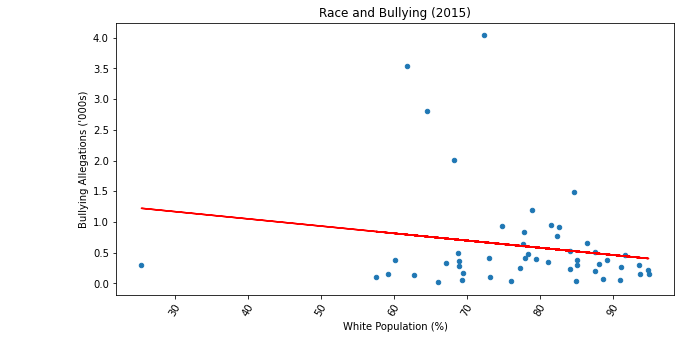

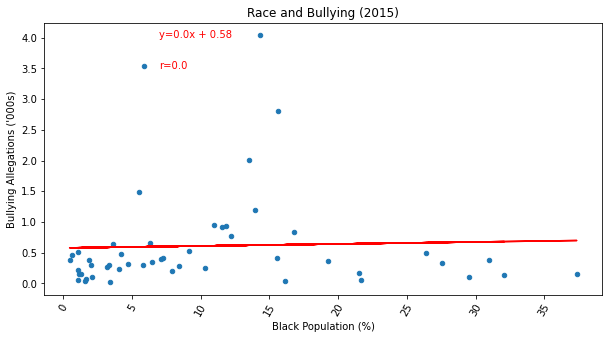

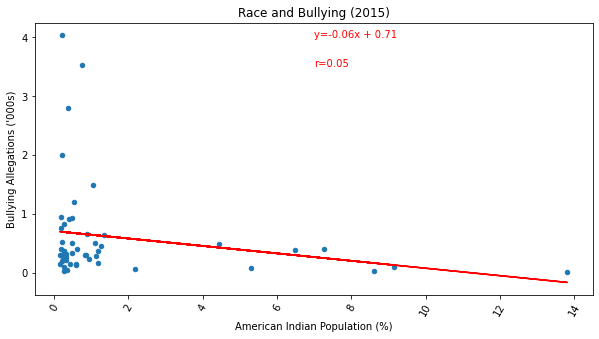

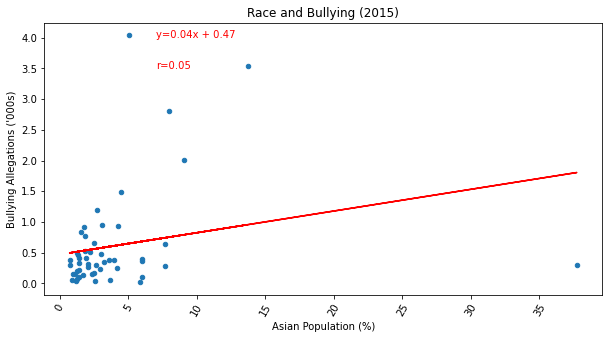

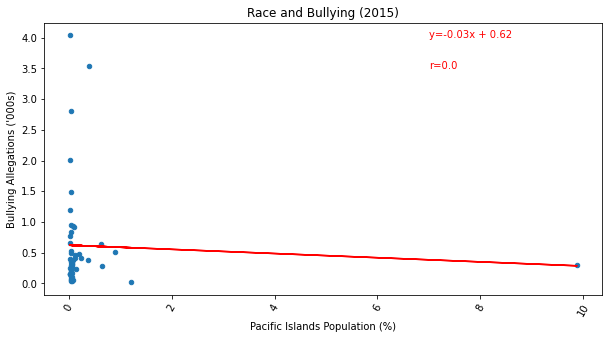

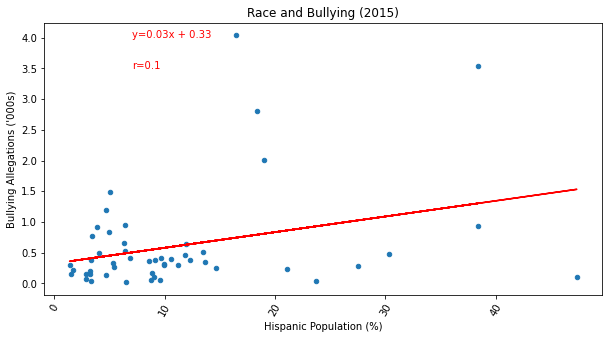

In [16]:
# Plot ethnicities and bullying allegations (due to race) by state to see if racial bullying allegations

w_pop = bully_demo_df["White"]/bully_demo_df["Population"]*100
b_pop = bully_demo_df["Black"]/bully_demo_df["Population"]*100
n_pop = bully_demo_df["American Indian"]/bully_demo_df["Population"]*100
a_pop = bully_demo_df["Asian"]/bully_demo_df["Population"]*100
pi_pop = bully_demo_df["Pacific Islands"]/bully_demo_df["Population"]*100
h_pop = bully_demo_df["Hispanic"]/bully_demo_df["Population"]*100
allegations = bully_demo_df["Alleged_Racial_Harassment"]/1000

ethnicity_df_list = [w_pop,b_pop,n_pop,a_pop,pi_pop,h_pop]
ethnicity_list = ["White","Black","American Indian","Asian","Pacific Islands","Hispanic"]

count=0

for ethnicity in ethnicity_df_list:
    ethnicity_df = pd.DataFrame({"Ethnicity":ethnicity, "Allegations": allegations})

    ethnicity_df.plot(kind="scatter",x="Ethnicity",y="Allegations", rot=60,figsize=(10,5))
    plt.xlabel(f"{ethnicity_list[count]} Population (%)")
    plt.ylabel("Bullying Allegations ('000s)")
    plt.title("Race and Bullying (2015)")
    
    (slope, intercept, r, p, sem) = linregress(ethnicity_df["Ethnicity"], ethnicity_df["Allegations"])
    fit = slope * ethnicity_df["Ethnicity"] + intercept
    line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
    r_value = f"r={round(r**2,2)}"
    plt.plot(ethnicity_df["Ethnicity"],fit,"-r")
    plt.annotate(line_eq, (7,4),color="red")
    plt.annotate(r_value, (7,3.5), color="red")
    
    plt.savefig(f"Output/Images/{ethnicity_list[count]}_Bullying.png")
    
    count=count+1
    

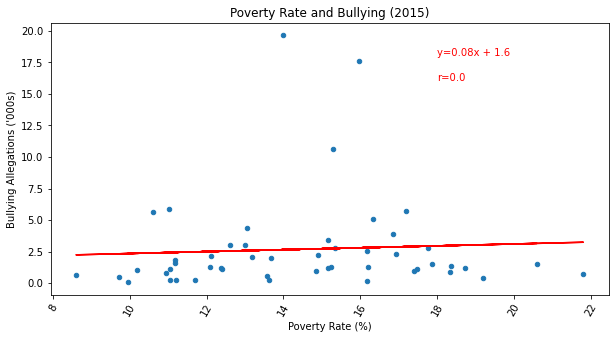

In [17]:
# Plot poverty rate and bullying allegations by state to see if poverty rate affects bullying allegations


poverty = bully_demo_df["Poverty Rate"]
allegations = bully_demo_df["Total_Allegations"]/1000


population_df = pd.DataFrame({"Poverty Rate":poverty, "Allegations": allegations})
population_df.plot(kind="scatter",x="Poverty Rate",y="Allegations", rot=60,figsize=(10,5))

(slope, intercept, r, p, sem) = linregress(population_df["Poverty Rate"], population_df["Allegations"])
fit = slope * population_df["Poverty Rate"] + intercept
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
r_value = f"r={round(r**2,2)}"
plt.plot(population_df["Poverty Rate"],fit,"-r")
plt.annotate(line_eq, (18,18),color="red")
plt.annotate(r_value, (18,16), color="red")

plt.xlabel("Poverty Rate (%)")
plt.ylabel("Bullying Allegations ('000s)")
plt.title("Poverty Rate and Bullying (2015)")

plt.savefig(f"Output/Images/Poverty_Bullying.png")

plt.show()

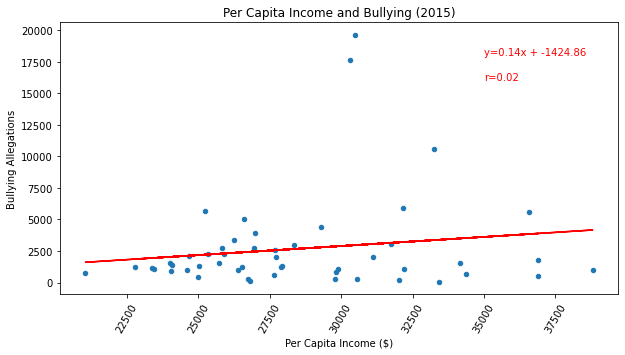

In [18]:
# Plot per capita income and bullying allegations by state to see if poverty rate affects bullying allegations


income = bully_demo_df["Per Capita Income"]
allegations = bully_demo_df["Total_Allegations"]


population_df = pd.DataFrame({"Per Capita Income":income, "Allegations": allegations})
population_df.plot(kind="scatter",x="Per Capita Income",y="Allegations", rot=60,figsize=(10,5))

(slope, intercept, r, p, sem) = linregress(population_df["Per Capita Income"], population_df["Allegations"])
fit = slope * population_df["Per Capita Income"] + intercept
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
r_value = f"r={round(r**2,2)}"
plt.plot(population_df["Per Capita Income"],fit,"-r")
plt.annotate(line_eq, (35000,18000),color="red")
plt.annotate(r_value, (35000,16000), color="red")


plt.xlabel("Per Capita Income ($)")
plt.ylabel("Bullying Allegations")
plt.title("Per Capita Income and Bullying (2015)")

plt.savefig(f"Output/Images/PerCapitaIncome_Bullying.png")

plt.show()

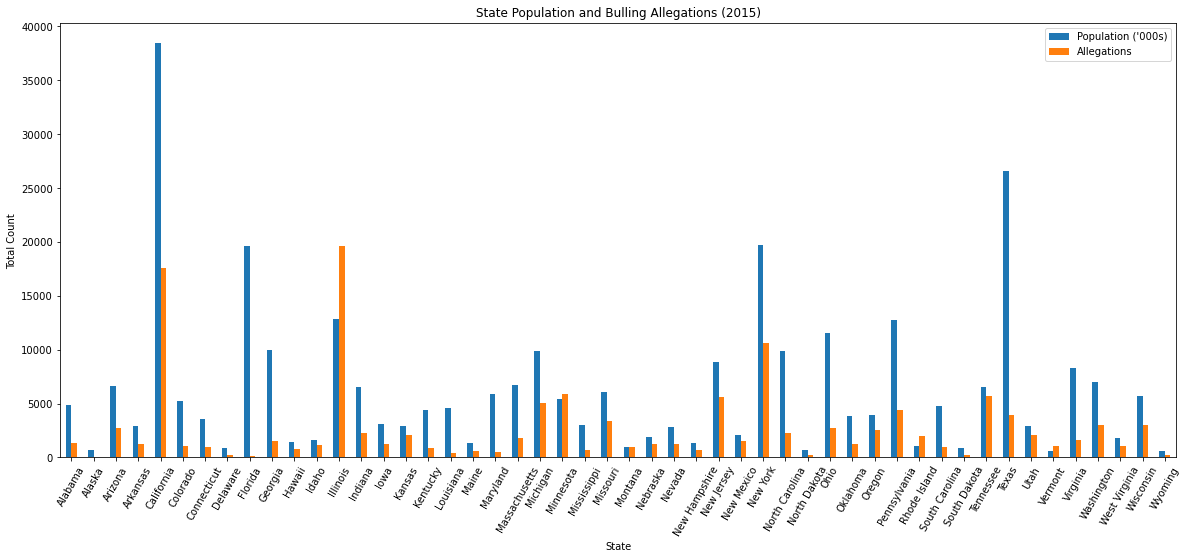

In [19]:
# Plot population and bullying allegations by state to see if cases numbers align with population

states = bully_demo_df["State"].tolist()
population = bully_demo_df["Population"]/1000
allegations = bully_demo_df["Total_Allegations"]

x_axis = np.arange(50)
tick_locations = [value for value in x_axis]

population_df = pd.DataFrame({"Population ('000s)":population, "Allegations": allegations})
population_df.plot(kind="bar",rot=60,figsize=(20,8))
plt.xticks(tick_locations,states)
plt.xlabel("State")
plt.ylabel("Total Count")
plt.title("State Population and Bulling Allegations (2015)")
plt.show()

In [20]:
# Import latitude & longitude of states and merge with bullying data

states_df = pd.read_csv("Input/state_locs.csv")
states_df = states_df.rename(columns={"name":"State"})
states_df = states_df.drop(columns=["state"])
states_bully_df = pd.merge(states_df, bully_df, on="State")
states_bully_df.head()

,latitude,longitude,State,Alleged_Sexual_Harassment,Alleged_Racial_Harassment,Alleged_Disability_Harassment,Alleged_Orientation_Harassment,Alleged_Religion_Harassment,Total_Allegations
0,63.588753,-154.493062,Alaska,0,0,0,0,0,0
1,63.588753,-154.493062,Alaska,0,0,0,0,0,0
2,63.588753,-154.493062,Alaska,0,0,0,0,0,0
3,63.588753,-154.493062,Alaska,0,0,0,0,0,0
4,63.588753,-154.493062,Alaska,0,0,0,0,0,0


In [21]:
# Create heat map of bullying allegations across the US

fig = gmaps.figure()

locations = states_bully_df[["latitude","longitude"]]
bullying = states_bully_df["Total_Allegations"].astype(float)

heat_layer = gmaps.heatmap_layer(locations,weights=bullying,dissipating=False,max_intensity=bullying.max(),
                                point_radius=5)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
# Create combined DataFrame with all state assessment scores by state

frames = [math_df,reading_df,science_df]

tests_df = pd.concat(frames)
tests_df.head()

In [ ]:
# Find scores greater than or equal to 50%

ge50_counts = []

for state in us.states.STATES:
    upper_state = str(state).upper()
    ge50 = tests_df.loc[(tests_df["Value"]=="GE50") & (tests_df["State"]==upper_state)]
    ge50_count = ge50["Value"].count()
    ge50_counts.append(ge50_count)

In [ ]:
# Plot scores GE50 vs. Bulling Allegations

y_axis = ge50_counts
x_axis = allegations_by_state["Total_Allegations"]

plt.scatter(x_axis,y_axis)
plt.xlabel("Bullying Allegations by State")
plt.ylabel("Assessment Scores GE50%")
plt.title("Bullying and Academic Performance (2015)")

(slope, intercept, r, p, sem) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
r_value = f"r={round(r**2,2)}"
plt.plot(x_axis,fit,"-r")
plt.annotate(line_eq, (13000,70000),color="red")
plt.annotate(r_value, (13000,65000), color="red")

In [ ]:
# Find scores less than 50%

lt50_counts = []

for state in us.states.STATES:
    upper_state = str(state).upper()
    lt50 = tests_df.loc[(tests_df["Value"]=="LT50") & (tests_df["State"]==upper_state)]
    lt50_count = lt50["Value"].count()
    lt50_counts.append(lt50_count)

In [ ]:
# Plot scores LT50 vs. Bulling Allegations

y_axis = lt50_counts
x_axis = allegations_by_state["Total_Allegations"]

plt.scatter(x_axis,y_axis)
plt.xlabel("Bullying Allegations by State")
plt.ylabel("Assessment Scores LT50%")
plt.title("Bullying and Academic Performance (2015)")

(slope, intercept, r, p, sem) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
r_value = f"r={round(r**2,2)}"
plt.plot(x_axis,fit,"-r")
plt.annotate(line_eq, (12500,10000),color="red")
plt.annotate(r_value, (12500,5000), color="red")

plt.savefig(f"Output/Images/LT50_Test_Scores.png")

In [ ]:
# Find graduation rates greater than or equal to 50%

ge50_counts = []

for state in us.states.STATES:
    upper_state = str(state).upper()
    ge50 = grad_df.loc[(grad_df["Value"]=="GE50") & (grad_df["State"]==upper_state)]
    ge50_count = ge50["Value"].count()
    ge50_counts.append(ge50_count)

In [ ]:
# Plot graduation rates GE50 vs. Bulling Allegations

y_axis = ge50_counts
x_axis = allegations_by_state["Total_Allegations"]

plt.scatter(x_axis,y_axis)
plt.xlabel("Bullying Allegations by State")
plt.ylabel("Graduation Rates GE50%")
plt.title("Bullying and Graduation Rates (2015)")

(slope, intercept, r, p, sem) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
r_value = f"r={round(r**2,2)}"
plt.plot(x_axis,fit,"-r")
plt.annotate(line_eq, (12500,3500),color="red")
plt.annotate(r_value, (12500,3250), color="red")

In [ ]:
# Find graduation rates less than 50%

lt50_counts = []

for state in us.states.STATES:
    upper_state = str(state).upper()
    lt50 = grad_df.loc[(grad_df["Value"]=="LT50") & (grad_df["State"]==upper_state)]
    lt50_count = lt50["Value"].count()
    lt50_counts.append(lt50_count)

In [ ]:
# Plot graduation rates LT50 vs. Bulling Allegations

y_axis = lt50_counts
x_axis = allegations_by_state["Total_Allegations"]

plt.scatter(x_axis,y_axis)
plt.xlabel("Bullying Allegations by State")
plt.ylabel("Graduation Rates LT50%")
plt.title("Bullying and Graduation Rates (2015)")

(slope, intercept, r, p, sem) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
r_value = f"r={round(r**2,2)}"
plt.plot(x_axis,fit,"-r")
plt.annotate(line_eq, (12500,650),color="red")
plt.annotate(r_value, (12500,600), color="red")

plt.savefig(f"Output/Images/LT50_Grad_Rates.png")